In [1]:
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sys
import json
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from pathlib import Path
import dotenv
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 
sys.path.insert(0, PATH_YANGNET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from tools_lnd import get_T_inds, plot_N, make_FP_axs, same_stim_trial, take_names, get_filename
from tools_lnd import gen_X_from_model_dir_epoch, gen_trials_from_model_dir, gen_X_from_model_dir
from tools_lnd import load_fps_from_interp, bifurc, gen_stim_trial_set, find_fp_dst_subspaces
from tools_lnd import make_lil_axes, get_interp_filename, plot_bifurc_ends

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# ##################################################################
# #fig save path
# ##################################################################
fig = 'fig4'
figpath = os.path.join(p_code,'figs',fig,fig+'_DEFGHI')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [5]:
# ##################################################################
# #Find right model dir
# ##################################################################
data_fldr = 'fig3_5'
file = 'LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1'
m = os.path.join(p_data,data_fldr,file)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3731: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

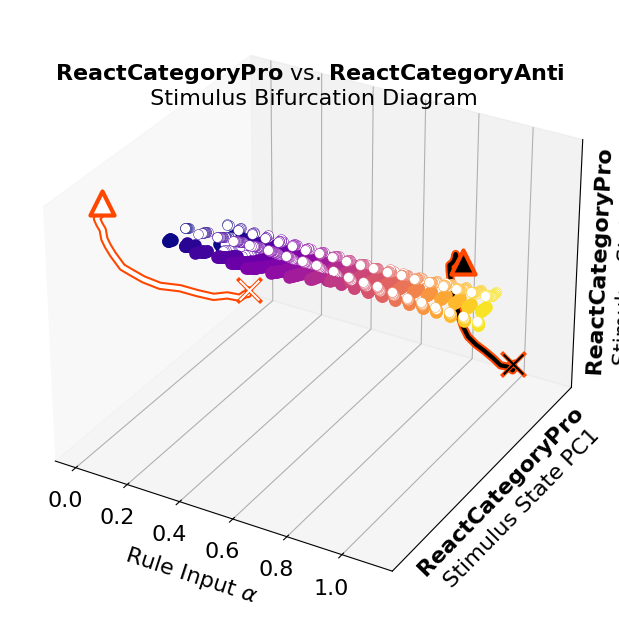

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3389: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

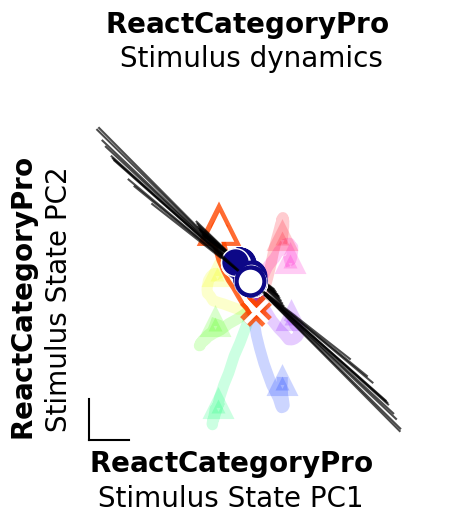

k
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3389: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


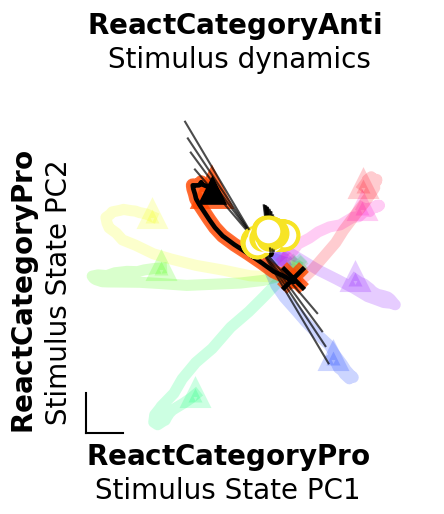

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1

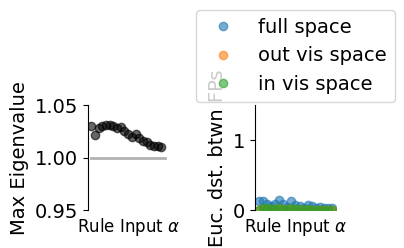

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3731: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

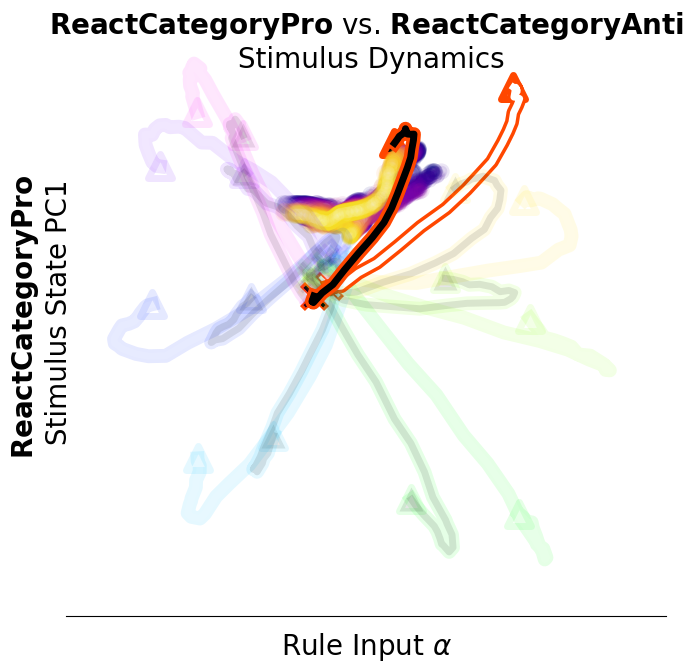

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3731: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

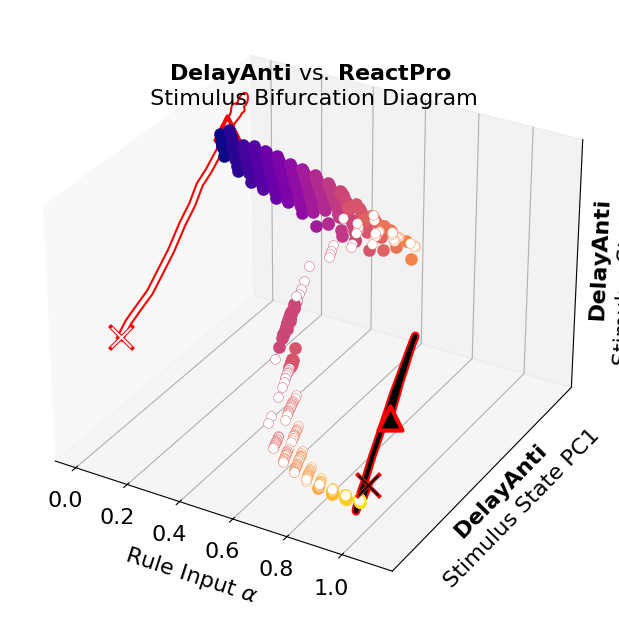

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3389: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

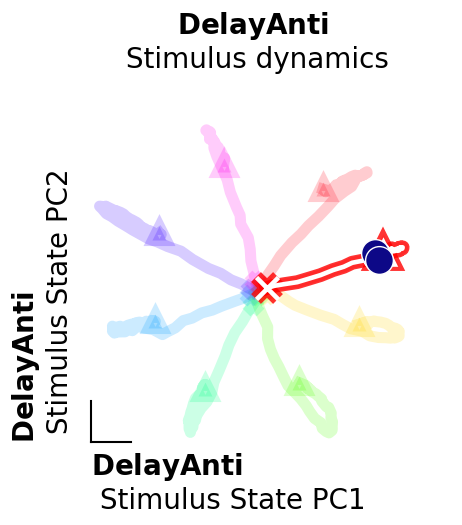

k
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3389: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


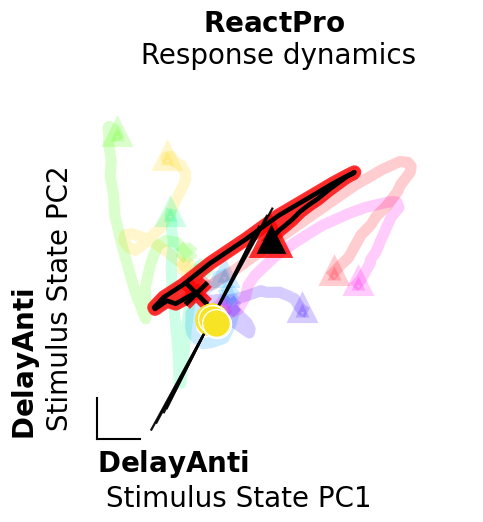

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/

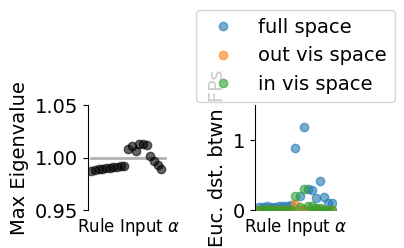

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt


/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig3_5/LeakyRNN_softplus_diag_15_tasks_128_n_rnn_lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo_1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multita

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3730: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:3731: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout,

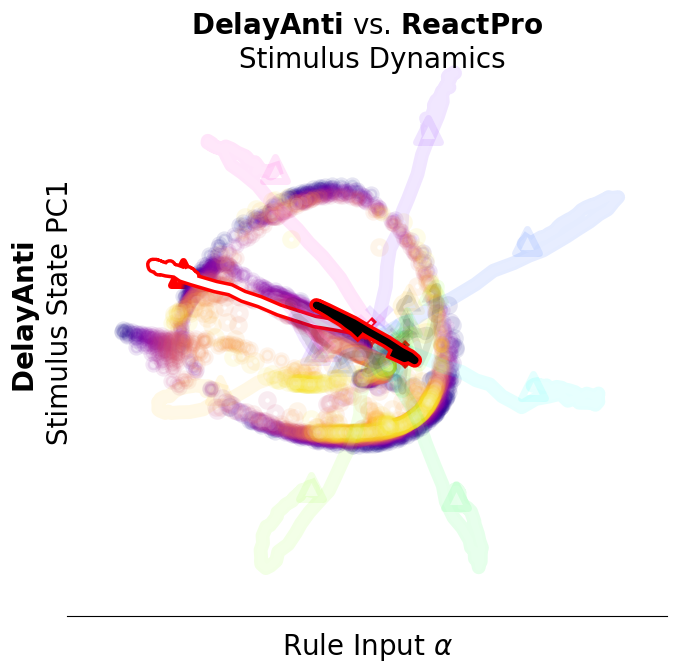

In [7]:
fig_size = 6
script_name = 'interp_tasks_small_init_stim'
q_thresh = 8e-7
tol_q = 1e-6
ax = 'pca_h'
subselect_unstable_set = [True,False]

ri_sets = [[13,14],[3,1]]#,[13,14],[10,9]]
epoch_sets = [['stim1','stim1'],['stim1','go1']]#,['stim1','stim1'],['stim1','stim1']]
set_tits = ['Category Motif','Different Motifs']#,'Category Motif','Decision Motif']
ruleset = 'all'


for set_i in range(len(ri_sets)): #[0,]:#
    ri_set = ri_sets[set_i]
    epoch_set = epoch_sets[set_i]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]

    seed=str(1)
    # m = os.path.join(p,data_folder,'all',rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)
    
    t_set = [0,0]
    rule_axs = 0
    rule = rule_set[rule_axs]
    trial = gen_trials_from_model_dir(m,rule,noise_on = False)
    filename = 'filename'
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
    D_use = make_FP_axs(f, m, rule, epoch_set[rule_axs], axs = ax, clust = 'False')
    if set_i==0:
        # D_use = -D_use
        D_use[:,1] = -D_use[:,1]
    else:
        D_use[:,1] = -D_use[:,1]
    epoch_name_ax, rule_name_ax, _, _ = take_names(epoch_set[rule_axs],rule_set[rule_axs])
    ax_labels = [r"Rule Input $\alpha$",
                 r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC1',
                 r"$\bf{"+rule_name_ax+"}$"+'\n '+epoch_name_ax+' State PC2']
                
#     D_use = make_FP_axs(f, m, rule_set, epoch_set, axs = 'pca_h_cat', clust = 'False')
#     if set_i==1:
#         D_use[:,0] = -D_use[:,0]
                    
#     ax_labels = [r"Rule Input $\alpha$",
#                  epoch_name_ax+' State PC1',
#                  epoch_name_ax+' State PC2']
    
    bifurc(m,D_use,ri_set,epoch_set,t_set,script_name = script_name,tol_q = tol_q,
         q_thresh = q_thresh,rule_axs = rule_axs, plot_unstable = True,title_y = .9,
         n_skip_interps=1,color_stim = True,fig_size = fig_size,fontsize = 16, threeD = True,
         figpath = figpath,ruleset = ruleset, stability_thresh = 1, 
                       lims = []) #, view_ang = [35,-60] ax_labels = ax_labels,

    plot_bifurc_ends(m,D_use,ri_set,epoch_set,script_name, lims = [],fac_mult_lims = 2,fp_first = False, 
                     stability_thresh = 1, color_stim = True, figpath = figpath, ruleset = ruleset,
                    plot_expansion = True,q_thresh = q_thresh,ax_labels = [ax_labels[1],ax_labels[2]])

    trial_set = gen_stim_trial_set(m,ri_set)
    diff_rel_fp, diff_rel_fp_in, diff_rel_fp_out,f = find_fp_dst_subspaces(m, D_use,trial_set,
                                                                         epoch_set,ri_set,t_set,
                                                                         q_thresh = q_thresh,
                                                                         script_name = script_name,
                                                                         figpath = figpath,
                                                                         subselect_unstable = subselect_unstable_set[set_i])

    D_use[:,0] = -D_use[:,0]
    bifurc(m,D_use,ri_set,epoch_set,rule_axs = rule_axs,ax_labels = ax_labels,script_name = script_name,
               color_stim = True, fig_size = 6, fontsize = 20, figpath = figpath, ruleset = ruleset,
               title_y = .9, n_trials = 8, stability_thresh = 1, threeD = False,
               lw = 10,ms = 10,linestyle = '-',al_state = 1,al_fp = .1, 
               bifurc = False, plot_zero_plane = False)


In [ ]:
def make_lil_axes(ax,axes_labels,fontsize = 20):
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    [x1,x2] = ax.get_xlim()
    x1 = x1*.8
    x2 = x2*.8
    x_diff = x2-x1
    [y1,y2] = ax.get_ylim()
    y1 = y1*.8
    y2 = y2*.8
    y_diff = y2-y1

    plt.plot([x1,x1+x_diff/10],[y1,y1],'-k')
    plt.plot([x1,x1],[y1,y1+y_diff/10],'-k')
    plt.text(x1,y1-y_diff/10,axes_labels[0],fontsize = fontsize)
    plt.text(x1-x_diff/6,y1+y_diff/10,axes_labels[1],fontsize = fontsize)
    ax.set_yticks([])
    ax.set_xticks([])

In [ ]:
def var_ex_X_task(m, rule_ax, rule, epoch_set, batch_size = 1000, 
                  plot_legend = False,fontsize = 20):

    _, rule_name, _, _ = take_names(epoch_set[0],rule)
    _, rule_name_ax, _, _ = take_names(epoch_set[1],rule_ax)

    trial = gen_trials_from_model_dir(m,rule,mode='random',noise_on = False,batch_size = batch_size)
    X, _ = gen_X_from_model_dir_epoch(m,trial,epoch_set[0])
    n_components = len(X)-1
    pca = PCA(n_components = n_components)
    _ = pca.fit_transform(X.T)

    trial = gen_trials_from_model_dir(m,rule_ax,mode='random',noise_on = False,batch_size = batch_size)
    X_ax, _ = gen_X_from_model_dir_epoch(m,trial,epoch_set[1])
    pca_ax = PCA(n_components = n_components)
    _ = pca_ax.fit_transform(X_ax.T)

    var_same = np.var(np.dot(pca.components_,X),axis = 1)
    var_ax = np.var(np.dot(pca_ax.components_,X),axis = 1)

    fig = plt.figure(figsize=(2.7,4),tight_layout=True,facecolor='white')
    ax = plt.subplot(1,1,1)
    plt.rcParams.update({'font.size': fontsize})
    plt.plot(np.cumsum(var_same)/np.sum(var_same),'-ok',linewidth = 3,markersize = 10,alpha = .2,
             label = 'Same Task PCs')
    plt.plot(np.cumsum(var_ax)/np.sum(var_same),'-o',c = 'mediumorchid', linewidth = 3,markersize = 10,
             alpha = .2,label = 'Other Task PCs')
    
    tick_fontsize = fontsize*.75
    label_fontsize = fontsize*1
    plt.xlabel('N PCs',fontsize = label_fontsize)
    ax.xaxis.set_label_coords(.15, -0.025)
    plt.ylabel(rule_name +'\n Variance Explained',fontsize = label_fontsize)
    plt.ylabel('Variance Explained',fontsize = label_fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks([.2,.4,.6,.8,1])
    ax.set_yticklabels([.2,.4,.6,.8,1],fontdict={'fontsize':tick_fontsize})
    ax.set_xticks([n_components - (n_components%100),])
    ax.set_xticklabels([n_components - (n_components%100),],fontdict={'fontsize':tick_fontsize})
    ax.set_ylim([0,1.1])
    ax.set_xlim([-20,n_components+20])

    if plot_legend==True:
        plt.legend()

In [ ]:
def plot_task_overlap(m,ri_set,epoch_set = ['stim1','stim1'],tit = [],ri_axs = 0, plot_legend = False,
                      figsize = 4,fontsize = 20):
    fig = plt.figure(figsize=(figsize,figsize),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': fontsize})

    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    axs = 'pca_h'
    rule_str = '_'.join(str(r) for r in rule_set)

    cmap_grad = plt.get_cmap('plasma')
    if ri_axs==1:
        cmap_discrete = ['dimgray','gainsboro']
    else:
        cmap_discrete = ['gainsboro','dimgray']
        
    epoch = epoch_set[ri_axs]
    rule = rule_set[ri_axs]

    trial = gen_trials_from_model_dir(m,rule,noise_on = False)
    filename,_ = get_filename(trial,epoch,0)
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
    D_use = make_FP_axs(f, m, rule, epoch, axs = axs, clust = 'False')
    epoch_name, rule_name1, _, _ = take_names(epoch,rule_set[0])
    epoch_name, rule_name2, _, _ = take_names(epoch,rule_set[1])

    for ri in range(2):

        rule = rule_set[ri]
        epoch = epoch_set[ri]
        c_master = cmap_discrete[ri]

        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        trial_set = range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/10))

        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch_set[ri])
        x_epoch = np.transpose(x[:,:,(T_inds[0]-1):T_inds[-1]],(1,2,0))

        ax = plt.subplot(111)

        plot_N(x_epoch[trial_set,:,:],D_use.T,trial.stim_locs[trial_set,0],
               linewidth = 18,linestyle = '-', alpha = .1, markersize = 20)
        plot_N(x_epoch[trial_set,:,:],D_use.T,[cmap_discrete[ri],],linewidth = 6, 
               linestyle =  '-', alpha = .9, markersize = 10)

    if len(tit)<1:
        tit = rule_name1+' vs.'+rule_name2
    plt.title(tit,fontsize = fontsize,fontweight='bold')

    tit_save = '_'.join(tit.split())
    make_lil_axes(ax,['PC1','PC2'])

    fig_fldr = '2_task_viz'
    if not os.path.exists(os.path.join(figpath,fig_fldr)):
        os.makedirs(os.path.join(figpath,fig_fldr))

    plt.savefig(os.path.join(figpath,fig_fldr,tit_save+'.pdf'),bbox_inches='tight')
#     plt.savefig(os.path.join(figpath,fig_fldr,tit_save+'.png'))
    plt.show()

    var_ex_X_task(m, rule_set[ri_axs], rule_set[1-ri_axs], [epoch_set[1-ri_axs],
                                                                epoch_set[ri_axs]], plot_legend = plot_legend)
    fig_fldr = '2_task_var'
    if not os.path.exists(os.path.join(figpath,fig_fldr)):
        os.makedirs(os.path.join(figpath,fig_fldr))

    plt.savefig(os.path.join(figpath,fig_fldr,tit_save+'.pdf'),bbox_inches='tight')
#     plt.savefig(os.path.join(figpath,fig_fldr,tit_save+'.png'))
    plt.show()

In [ ]:
# from tools_lnd import interp_h_tasks_w_context
def gen_trial_set(ri_set):
    rule1 = rules_dict['all'][ri_set[0]]
    trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
    trial2 = same_stim_trial(trial1, ri_set[1]) 
    trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
    return [trial1,trial2]

In [ ]:
from tools_lnd import gen_trials_from_model_dir, get_single_task_fp_filename, take_names, gen_D_fp_qr
from tools_lnd import gen_X_from_model_dir, get_interp_filename, comp_eig_decomp

def interp_h_tasks_max_eig(m, ri_set,trial_set,epoch_list,D_use = [],n_trials = 8,n_interp = 20,
                        q_thresh = 1e-6,linestyle = ['-',':'],al = .3,lw = 3,tit = [],ri_axs = 0,
                             fig_width = 4,fig_height = 4,fontsize = 20,trial_num=[0,0],
                             step_file = 'interp_tasks_small_init_mov',figpath = [],ruleset = []):

    fig = plt.figure(figsize=(fig_width,fig_height),tight_layout=True,facecolor='white')
    ax_dst2 = plt.subplot(111);
    plt.rcParams.update({'font.size': fontsize})
    q_tol_name = 'tol_q_e_6.0'
    
    for step_i in range(n_interp):

        f = get_interp_filename(trial_set[0],trial_set[1],epoch_list,trial_num)
        save_dir = os.path.join(m,step_file,'_'.join([rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]))
        fp_struct = np.load(os.path.join(save_dir,q_tol_name,f+'_step_'+str(step_i)+'.npz'))
        step_fps = fp_struct['xstar']
        fp_inds = np.where(fp_struct['qstar']<q_thresh)[0]
        
        for fp_ind in range(len(fp_inds)):

            fp = fp_inds[fp_ind]
            J_xstar = fp_struct['J_xstar'][[fp,],:,:]
            eig_decomps = comp_eig_decomp(J_xstar)

            evals, _ = LA.eig(fp_struct['J_xstar'][fp,:,:]) 
            max_eig = np.max(evals.real)
            ax_dst2.plot(step_i/n_interp,max_eig,'.k', markersize = 2, alpha = .05)

    tick_fontsize = fontsize*1#.75
    label_fontsize = fontsize*1

    ax_dst2.plot([0,1],[1,1],'-m', alpha = 1)
    ax_dst2.set_ylabel('Max Eigenvalue',color='k',fontsize=label_fontsize)
    ax_dst2.set_yticks([.95,1,1.05])
    ax_dst2.set_yticklabels([.95,1,1.05],fontdict={'fontsize':tick_fontsize,'color':'k'})
    ax_dst2.set_xlabel(r"Rule Input $\alpha$",fontsize = label_fontsize)    
    ax_dst2.spines['top'].set_visible(False)    
    ax_dst2.spines['right'].set_visible(False)

    if len(figpath)>0:

        tasks_str = '_'.join([rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]])
        epoch_str = '_'.join(epoch_list)
        step_file='max_eig'

        fldr = os.path.join(figpath,step_file,tasks_str,epoch_str)
        if not os.path.exists(fldr):
            os.makedirs(fldr)

        if len(ruleset)>0:
            figname = ruleset+'_'+tasks_str+'_'+epoch_str+'_'+step_file
        else:
            figname = tasks_str+'_'+epoch_str+'_'+step_file
        plt.savefig(os.path.join(fldr,figname+'.pdf'),bbox_inches='tight')
        plt.savefig(os.path.join(fldr,figname+'.png'))
    return

In [ ]:
from tools_lnd import comp_eig_decomp, make_lil_axes

ri_sets = [[3,1],[13,14]]#,[10,9]]
epoch_sets = [['stim1','go1'],['stim1','stim1']]#,['stim1','stim1']]
set_tits = ['Different Motifs','Category Motif']#,'Decision Motif']
ruleset = 'all'

for set_i in range(len(ri_sets)):
    ri_set = ri_sets[set_i]
    epoch_set = epoch_sets[set_i]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    set_tit = set_tits[set_i]
    
    fig = plt.figure(figsize=(4.5,4.5),tight_layout=True,facecolor='white')
    ax = plt.subplot(1,1,1)

    for seed_ind in range(3):
        seed=str(seed_ind)
        m = os.path.join(p,data_folder,ruleset,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

        if seed=='0':
            plot_legend = True
        else:
            plot_legend = False

        var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 40)

    rule_names = rules_dict['all'][ri_set[0]]+'_'+rules_dict['all'][ri_set[1]]
    figname = 'var_ex_'+rule_names+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

    fig_fldr = os.path.join(figpath,'var',rule_names)
    if not os.path.exists(fig_fldr):
        os.makedirs(fig_fldr)

    plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
    plt.show()

#     seed=str(0)
#     m = os.path.join(p,data_folder,'all',rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)
    
#     t_set = [0,0]
#     rule = rules_dict['all'][ri_set[0]]
#     filename = 'filename'
#     f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
#     D_use = make_FP_axs(f, m, rule, epoch_set[0], axs = 'pca_h', clust = 'False')
    
#     interp2d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_stim',tol_q = 1e-6,interp = False,
#              cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['gainsboro','dimgray'],q_thresh = .000001,
#              n_skip_interps=2, rule_axs = 0, plot_unstable = True, color_stim = True,figpath = figpath,fig_size = 6,
#              fontsize = 20,title_y = .9,set_tit = set_tit)


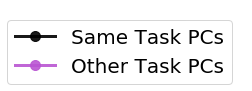

In [21]:
fig = plt.figure(figsize=(1, 1))

ax = plt.subplot(111)
ax.plot(1,1,'-ok',linewidth = 3,markersize = 10,alpha = .9,
         label = 'Same Task PCs')
ax.plot(1,1,'-o',c = 'mediumorchid', linewidth = 3,markersize = 10,
         alpha = .9,label = 'Other Task PCs')
ax.set_xlim([-1,0])
ax.set_ylim([-1,0])
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

fig_fldr = '2_task_var'
if not os.path.exists(os.path.join(figpath,fig_fldr)):
    os.makedirs(os.path.join(figpath,fig_fldr))

plt.savefig(os.path.join(figpath,fig_fldr,'legend.pdf'),bbox_inches='tight')
plt.savefig(os.path.join(figpath,fig_fldr,'legend.png'))
plt.show()

In [16]:
from tools_lnd import interp2d
def var_ex_X_task(m, rule_set, epoch_set, n_components = 200, batch_size = 1000, plot_legend = False):

    rule_name_set = {}
    _, rule_name_set[0], _, _ = take_names(epoch_set[0],rule_set[0])
    _, rule_name_set[1], _, _ = take_names(epoch_set[1],rule_set[1])

    trial = gen_trials_from_model_dir(m,rule_set[0],mode='random',noise_on = False,batch_size = 200)
    X, _ = gen_X_from_model_dir_epoch(m,trial,epoch_set[0])
    pca = PCA(n_components = n_components)
    _ = pca.fit_transform(X.T)

    trial = gen_trials_from_model_dir(m,rule_set[1],mode='random',noise_on = False,batch_size = 200)
    X_ax, _ = gen_X_from_model_dir_epoch(m,trial,epoch_set[1])
    pca_ax = PCA(n_components = n_components)
    _ = pca_ax.fit_transform(X_ax.T)

    var_same = np.var(np.dot(pca.components_,X),axis = 1)
    var_ax = np.var(np.dot(pca_ax.components_,X),axis = 1)

    plt.rcParams.update({'font.size': 16})
    plt.plot(np.cumsum(var_same)/np.sum(var_same),'-ok',linewidth = 3,markersize = 10,alpha = .5,
             label = rule_name_set[0] + ' PCs')
    plt.plot(np.cumsum(var_ax)/np.sum(var_same),'-o',c = 'mediumorchid', linewidth = 3,markersize = 10,
             alpha = .5,label = rule_name_set[1] + ' PCs')
    plt.xlabel('N PCs',fontsize = 18)
    ax.xaxis.set_label_coords(.15, -0.025)
    plt.ylabel(rule_name_set[0] +'\n Variance Explained',fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([n_components,])
    ax.set_ylim([0,1.1])
    ax.set_xlim([-.05*n_components,2.5*n_components])
    if plot_legend==True:
        plt.legend(loc='upper center', bbox_to_anchor=(0.01, 1.3))


In [14]:
def get_interp_filename(trial1,trial2,epoch_list,t_set):

    epoch_list = ['stim1','stim1']

    n_stim_per_ring = int(np.shape(trial1.y)[2]-1)
    stim_size = int(2*n_stim_per_ring+1)

    rule1 = rules_dict['all'][np.argmax(trial1.x[0,0,stim_size:])]
    rule2 = rules_dict['all'][np.argmax(trial2.x[0,0,stim_size:])]
    ind_stim_loc1  = 180*trial1.y_loc[-1,t_set[0]]/np.pi
    ind_stim_loc2  = 180*trial2.y_loc[-1,t_set[1]]/np.pi
    filename = rule1+'_'+rule2+'_'+'_'.join(epoch_list)+'_x'+str(round(ind_stim_loc1,2))+'_x'+str(round(ind_stim_loc2,2))

    return filename

def interp2d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov',tol_q = 1e-6,interp = True,
             cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['gainsboro','dimgray'],q_thresh = .001,
            n_skip_interps=2, rule_axs = 0, plot_unstable = True, color_stim = True,figpath = [],fig_size = 4,
            alpha_max = 1.1,fontsize = 20,title_y = .9,set_tit = []):
    
    fig = plt.figure(figsize=(fig_size,fig_size),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': fontsize})
    n_interp = 20

    epoch = epoch_set[rule_axs]
    epoch_name1, rule_name1, _, _ = take_names(epoch_set[0],rule_set[0])
    epoch_name2, rule_name2, _, _ = take_names(epoch_set[1],rule_set[1])
    if epoch_name1==epoch_name2:
        epoch_name = epoch_name1

    if interp:
        if script_name == 'interp_tasks_small_init_stim':
            trial1 = gen_trials_from_model_dir(m,rule_set[0],mode='test',noise_on = False)
            r2 = np.where([rules_dict['all'][i]==rule_set[1] for i in range(len(rules_dict['all']))])[0][0]
            trial2 = same_stim_trial(trial1, r2) 
            trial1 = gen_trials_from_model_dir(m,rule_set[0],mode='test',noise_on = False)
            filename_interp = get_interp_filename(trial1,trial2,['stim1','stim1'],t_set)
            
        elif script_name == 'interp_tasks_small_init_mov':
            trial1 = gen_trials_from_model_dir(m,rule_set[0],mode='test',noise_on = False)
            trial2 = gen_trials_from_model_dir(m,rule_set[1],mode='test',noise_on = False)
            trial2 = same_mov_inds(trial1, trial2) 
            trial1 = gen_trials_from_model_dir(m,rule_set[0],mode='test',noise_on = False)
            filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)

        for step_i in range(n_interp):#[9, 10, 8, 11, 7, 12, 6, 13, 5, 14, 4, 15, 3, 16, 2, 17, 1, 18, 19, 0]:
            c = cmap_grad(step_i/n_interp)

            fp_dir = os.path.join(m,script_name,rule_set[0]+'_'+rule_set[1],'tol_q_e_'+str(-np.log10(tol_q)),
                                  filename_interp+'_step_'+str(step_i)+'.npz')
            fp_struct = np.load(fp_dir)
            step_fps = fp_struct['xstar']
            fp_inds = np.where(fp_struct['qstar']<q_thresh)[0]  
            J_xstar = fp_struct['J_xstar'][fp_inds,:,:]
            sorted_fps = fp_struct['xstar'][fp_inds,:]
            eig_decomps = comp_eig_decomp(J_xstar)

            for fp_ind in range(len(fp_inds)):

                fp = np.dot(sorted_fps[fp_ind,:],D_use)

                stability_metric = alpha_max - np.max(eig_decomps[fp_ind]['evals'].real)
                facecolors_3d = c
                facecolors_2d = c
                edgecolors = 'w'
                al = stability_metric
                
                if np.max(eig_decomps[fp_ind]['evals'].real)>1:
                    if plot_unstable:
                        plt.plot(fp[0],fp[1],'o',c = edgecolors,linewidth = 10,markersize = 20,markerfacecolor = facecolors_2d,
                                 alpha = stability_metric)

                else:

                    plt.plot(fp[0],fp[1],'o',c = edgecolors,linewidth = 10,markersize = 20,markerfacecolor = facecolors_2d,
                                 alpha = stability_metric)
    
    for ri in range(2):

        rule = rule_set[ri]
        epoch = epoch_set[ri]
        c_master = cmap_discrete[ri]
        trial = gen_trials_from_model_dir(m,rule,mode='test',noise_on = False)
        trial_set = range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/8))

        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch_set[ri])
        T_inds_plot = range(np.max([T_inds[0]-1,0]),T_inds[-1])
        x_epoch = np.transpose(x[:,:,T_inds_plot],(1,2,0))

        ax = plt.subplot(111)
        stim1_locs = np.min(trial.stim_locs[:,[0,2]],axis=1)
        y_locs = trial.y_loc[-1,:]

        if color_stim:
            plot_N( x_epoch[trial_set,:,:],D_use.T,stim1_locs[trial_set],
                   linewidth = fig_size+1,linestyle = '-', alpha = .5, markersize = 20)
        else:
            plot_N(x_epoch[trial_set,:,:],D_use.T,y_locs[trial_set],
                   linewidth = fig_size+1,linestyle = '-', alpha = .5, markersize = 20)

        plot_N(x_epoch[trial_set,:,:],D_use.T,[cmap_discrete[ri],],linewidth = fig_size/2, 
               linestyle =  '-', alpha = .9, markersize = 10)

    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()
    ax.set_xlim([x1-.2*abs(x1),x2+.2*abs(x2)])
    ax.set_ylim([y1-.2*abs(y1),y2+.2*abs(y2)])
    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()

    if len(set_tit)>0:
        tit = set_tit 
        tit_name = set_tit
    elif rule_set[0]==rule_set[1]:
        tit = 'Single Task : '+rule_name1+'\n '+r"$\bf{"+epoch_name1+"}$"+' vs. '+r"$\bf{"+epoch_name2+"}$"+' dynamics' 
        tit_name = rule_name1+'_'+epoch_name1+'_v_'+epoch_name2+'_dynamics_2d'
    else:       
        tit = r"$\bf{"+rule_name1+"}$"+' vs. '+r"$\bf{"+rule_name2+"}$"+ '\n '+epoch_name1+' dynamics'
        tit_name = rule_name1+'_v_'+rule_name2+'_'+epoch_name1+'_dynamics_2d'   
    plt.title(tit,y = title_y)

    _, ax_rule_name, _, _ = take_names(epoch,rule_set[rule_axs])
    axes_label1 = r"$\bf{" + ax_rule_name + "}$"+' \n'+epoch_name1+' PC1'
    axes_label2 = r"$\bf{" + ax_rule_name + "}$"+' \n'+epoch_name1+' PC2'
    make_lil_axes(ax,[axes_label1,axes_label2],fontsize = fontsize)

    fig_fldr = 'interp_fps'
    if not os.path.exists(os.path.join(figpath,fig_fldr,script_name)):
        os.makedirs(os.path.join(figpath,fig_fldr,script_name))

    plt.savefig(os.path.join(figpath,fig_fldr,script_name,tit_name+'.pdf'),bbox_inches='tight')
    plt.show()

In [ ]:
from tools_lnd import comp_eig_decomp, make_lil_axes, var_ex_X_task

ri_sets = [[3,1],[13,14]]#,[10,9]]
epoch_sets = [['stim1','go1'],['stim1','stim1']]#,['stim1','stim1']]
set_tits = ['Different Motifs','Category Motif']#,'Decision Motif']
ruleset = 'all'

for set_i in range(len(ri_sets)):
    ri_set = ri_sets[set_i]
    epoch_set = epoch_sets[set_i]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    set_tit = set_tits[set_i]
    
    fig = plt.figure(figsize=(4.5,4),tight_layout=True,facecolor='white')
    ax = plt.subplot(1,1,1)

    for seed_ind in range(3):
        seed=str(seed_ind)
        m = os.path.join(p,data_folder,ruleset,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

        if seed=='0':
            plot_legend = True
        else:
            plot_legend = False

        var_ex_X_task(ax, m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 40)

    rule_names = rules_dict['all'][ri_set[0]]+'_'+rules_dict['all'][ri_set[1]]
    figname = 'var_ex_'+rule_names+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

    fig_fldr = os.path.join(figpath,'var',rule_names)
    if not os.path.exists(fig_fldr):
        os.makedirs(fig_fldr)

    plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
    plt.show()

    seed=str(0)
    m = os.path.join(p,data_folder,'all',rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)
    
    t_set = [0,0]
    rule = rules_dict['all'][ri_set[0]]
    filename = 'filename'
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
    D_use = make_FP_axs(f, m, rule, epoch_set[0], axs = 'pca_h', clust = 'False')
    
    interp2d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_stim',tol_q = 1e-6,interp = False,
             cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['gainsboro','dimgray'],q_thresh = .000001,
             n_skip_interps=2, rule_axs = 0, plot_unstable = True, color_stim = True,figpath = figpath,fig_size = 6,
             fontsize = 20,title_y = .9,set_tit = set_tit)


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/mod

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


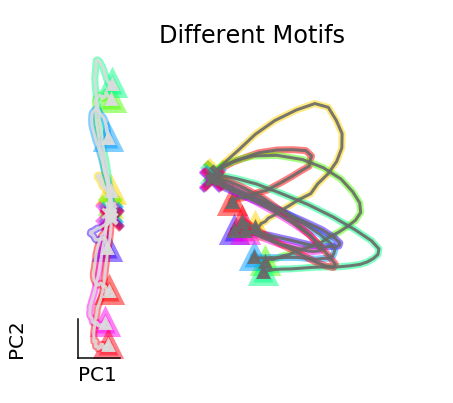

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel

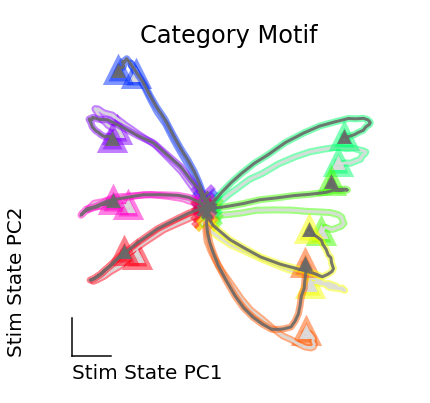

In [12]:
from tools_lnd import comp_eig_decomp, make_lil_axes, var_ex_X_task, interp2d

ri_sets = [[3,1],[13,14]]#,[10,9]]
epoch_sets = [['stim1','go1'],['stim1','stim1']]#,['stim1','stim1']]
set_tits = ['Different Motifs','Category Motif']#,'Decision Motif']
ruleset = 'all'

for set_i in range(len(ri_sets)):
    ri_set = ri_sets[set_i]
    epoch_set = epoch_sets[set_i]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    set_tit = set_tits[set_i]
    
#     fig = plt.figure(figsize=(4.5,4),tight_layout=True,facecolor='white')
#     ax = plt.subplot(1,1,1)

#     for seed_ind in range(3):
#         seed=str(seed_ind)
#         m = os.path.join(p,data_folder,ruleset,rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

#         if seed=='0':
#             plot_legend = True
#         else:
#             plot_legend = False

#         var_ex_X_task(ax, m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 40)

#     rule_names = rules_dict['all'][ri_set[0]]+'_'+rules_dict['all'][ri_set[1]]
#     figname = 'var_ex_'+rule_names+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

#     fig_fldr = os.path.join(figpath,'var',rule_names)
#     if not os.path.exists(fig_fldr):
#         os.makedirs(fig_fldr)

#     plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
#     plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
#     plt.show()

    seed=str(0)
    m = os.path.join(p,data_folder,'all',rnn_type,activation,w_init,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)
    
    t_set = [0,0]
    rule = rules_dict['all'][ri_set[0]]
    rule_str = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    filename = 'filename'
    f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
    D_use = make_FP_axs(f, m, rule_str, epoch_set, axs = 'pca_h_cat', clust = 'False')
    
    interp2d(m,D_use,ri_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_stim',tol_q = 1e-6,interp = False,
             cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['gainsboro','dimgray'],q_thresh = .000001,
             n_skip_interps=2, rule_axs = 0, plot_unstable = True, color_stim = True,figpath = figpath,fig_size = 6,
             fontsize = 20,title_y = .9,tit_name = set_tit, axs = 'pca_h_cat')


In [10]:
def get_interp_filename(trial1,trial2,epoch_list,t_set):

    # if epoch_list==['fix1','fix1'] & rule1[:5]=='delay':
    #     epoch_list = ['delay1','delay1']

    n_stim_per_ring = int(np.shape(trial1.y)[2]-1)
    stim_size = int(2*n_stim_per_ring+1)

    rule1 = rules_dict['all'][np.argmax(trial1.x[0,0,stim_size:])]
    rule2 = rules_dict['all'][np.argmax(trial2.x[0,0,stim_size:])]
    ind_stim_loc1  = 180*trial1.y_loc[-1,t_set[0]]/np.pi
    ind_stim_loc2  = 180*trial2.y_loc[-1,t_set[1]]/np.pi
    filename = rule1+'_'+rule2+'_'+'_'.join(epoch_list)+'_x'+str(round(ind_stim_loc1,2))+'_x'+str(round(ind_stim_loc2,2))
#     filename = rule1+'_'+rule2+'_'+'_'.join(epoch_list)+'_x'+str(round(ind_stim_loc1,2))+'_x'+str(round(ind_stim_loc1,2)) #DEBUGGING REMOVE THIS LINE

    return filename


In [50]:
# def plot_bifurc_ends(m,D_use,rule_set,epoch_set,script_name,tol_q = 1e-6,t_set = [0,0],
#                      q_thresh = .0000001,fig_size = 4, lims = [], fac_mult_lims = 1.5,
#                      stability_thresh = 1,fp_first = True, color_stim = True, step_set = [0,19],
#                      figpath = 'plot_bifurc_ends',ruleset = 'all',fontsize = 20, 
#                      plot_unstable = True,plot_expansion = False, plot_bifurc_ends):
    
#     cmap_discrete = ['w','k']
#     cmap_grad = plt.get_cmap('plasma')

#     rule1 = rules_dict['all'][rule_set[0]]
#     rule2 = rules_dict['all'][rule_set[1]]
#     rule_str = [rule1,rule2]

#     if color_stim:
#         trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
#         trial2 = same_stim_trial(trial1, rule_set[1]) 
#         trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
#     else:
#         trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
#         trial2 = gen_trials_from_model_dir(m,rule2,mode='test',noise_on = False)
#         trial2 = same_mov_inds(trial1, trial2) 
#         trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)

#     save_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)))

#     filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)
#     trial_set = [trial1, trial2]

#     trial_inds = range(0,np.shape(trial1.x)[1],int(np.shape(trial1.x)[1]/8))

#     for ri in [0,1]:
#         fig = plt.figure(figsize=(fig_size,fig_size),tight_layout=True,facecolor='white')
#         ax = fig.add_axes([0,0,1,1])

#         sorted_fps, eig_decomps = load_fps_from_interp(m,script_name,rule_str,tol_q,filename_interp,
#                                                          step_set[ri],q_thresh)

#         if fp_first:
#             plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
#                 stability_thresh = stability_thresh, plot_unstable = plot_unstable,
#                 plot_expansion = plot_expansion)
        
#         rule = rule_str[ri]
#         epoch = epoch_set[ri]
#         c_master = cmap_discrete[ri]
#         print(c_master)

#         trial = gen_trials_from_model_dir(m,rule,mode='test',noise_on = False)

#         _,x = gen_X_from_model_dir(m,trial)
#         T_inds = get_T_inds(trial,epoch_set[ri])
#         T_inds_plot = range(np.max([T_inds[0]-1,0]),T_inds[-1])
#         x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))


#         cmap_state = plt.get_cmap('hsv')
#         if color_stim:
#             c_set = np.min(trial.stim_locs[:,[0,2]],axis = 1)
#             s = np.argwhere(c_set == np.min(trial1.stim_locs[t_set[0],[0,2]]))[0][0]
#             c = cmap_state(c_set[s]/(2*np.pi))
#         else:
#             c_set = trial.y_loc[-1,:]
#             s = np.argwhere(c_set==trial1.y_loc[-1,t_set[0]])[0][0]
#             c = cmap_state(c_set[s]/(2*np.pi))

#         lw = 10
#         plot_N(x_epoch[trial_inds,:,:], D_use.T, c_set[trial_inds], linewidth = fig_size*2, alpha = .2)
#         plot_N(x_epoch[[s,],:,:], D_use.T, c, linewidth = lw, alpha = .8 ,markersize = 16)
#         plot_N(x_epoch[[s,],:,:], D_use.T, c_master, linewidth = lw/3, alpha = 1 ,markersize = 16)

#         if not fp_first:
#             plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
#                 stability_thresh = stability_thresh, plot_unstable = plot_unstable,
#                 plot_expansion = plot_expansion)

#         if len(lims)>0:
#             ax.set_xlim([fac_mult_lims*lims[0],fac_mult_lims*lims[1]])
#             ax.set_ylim([fac_mult_lims*lims[2],fac_mult_lims*lims[3]])
#         else:
# #             [x1,x2] = ax.get_xlim()
# #             [y1,y2] = ax.get_ylim()
# #             ax.set_xlim([x1-.2*abs(x1),x2+.2*abs(x2)])
# #             ax.set_ylim([y1-.2*abs(y1),y2+.2*abs(y2)])
            
#             ax.set_ylim([-1.15,1.15])
#             ax.set_xlim([-1.15,1.15])

#         epoch_name, rule_name, _, _ = take_names(epoch_set[ri],rule_str[ri])
              
#         if len(ax_labels)>0:
#             make_lil_axes(ax,ax_labels)

#         tit = r"$\bf{"+rule_name+"}$"+'\n '+epoch_name+' dynamics'
#         tit_name = rule_name+'_'+epoch_name+'_dynamics'
#         plt.title(tit,fontsize = fontsize)#,y = .9
#         fig_fldr = os.path.join(figpath,'interp_fps',ruleset,'bifurcation')
#         if not os.path.exists(fig_fldr):
#             os.makedirs(fig_fldr)

#         plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
#         plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
#         plt.show()

In [51]:
# from tools_lnd import remove_spines

# def plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_i, n_interp = 20, stability_thresh = 1,ms = 20, 
#     plot_unstable = True,plot_expansion = False,rf = 150):
#     cmap_grad = plt.get_cmap('plasma')
#     c = cmap_grad(step_i/n_interp)

#     for fp_ind in range(len(sorted_fps)):

#         fp = np.dot(sorted_fps[fp_ind,:],D_use[:,[0,1]])

#         stability_metric = 1
#         facecolors_3d = c
#         facecolors_2d = c
#         edgecolors = 'w'
#         al = stability_metric

#         if np.max(eig_decomps[fp_ind]['evals'].real)>stability_thresh:

#             if plot_expansion:
#                 n_arg = np.argwhere(eig_decomps[fp_ind]['evals']>1)+1
#                 if len(n_arg)>0:
#                     for arg in range(np.max(n_arg)):
#                         rdots = np.dot(np.real(eig_decomps[fp_ind]['R'][:, arg]).T,D_use[:,[0,1]])
#                         ldots = np.dot(np.real(eig_decomps[fp_ind]['L'][:, arg]).T,D_use[:,[0,1]])
#                         overlap = np.dot(rdots,ldots.T)
#                         r = np.concatenate((fp - rf*overlap*rdots, fp + rf*overlap*rdots),0)
#                         plt.plot(r[0:4:2],r[1:4:2], c = 'k' ,alpha = .5,linewidth = 1)

#             if plot_unstable:
#                 plt.plot(fp[0],fp[1],'o',c = c,linewidth = 10,markersize = ms,markerfacecolor = 'w',
#                          alpha = stability_metric,markeredgewidth=3)
#         else:
#             plt.plot(fp[0],fp[1],'o',c = edgecolors,linewidth = 10,markersize = ms,
#                 markerfacecolor = facecolors_2d,alpha = stability_metric)

#     ax.set_yticks([])
#     ax.set_xticks([])
#     remove_spines(ax)

In [52]:
# def plot_N(X, D, clist, linewidth = 1, alpha = .5, linestyle = '-', cmap_c = 'hsv',
#     markersize = 10, edgecolors = []):
#     """Plot activity is some 2D space.

#         Args:
#             X: neural activity in Trials x Time x Neurons
#             D: Neurons x 2 plotting dims
#         """

#     cmap=plt.get_cmap(cmap_c)
#     S = np.shape(X)[0]
    
#     print(len(clist))
    
#     for s in range(S):

#         if len(clist)<2:
#             c = clist[0]
#         elif len(clist)==4:
#             c = clist
#         else:
#             c = cmap(clist[s]/max(clist))

#         X_trial = np.dot(X[s,:,:],D.T)
#         plt.plot(X_trial[-1,0],X_trial[-1,1],'^',c = c, linewidth = linewidth, alpha = alpha, markersize = markersize,markeredgewidth = linewidth)
#         plt.plot(X_trial[:,0],X_trial[:,1],linestyle,c = c, linewidth = linewidth, alpha = alpha, markersize = markersize)
#         plt.plot(X_trial[0,0],X_trial[0,1],'x',c = c, linewidth = linewidth, alpha = alpha,markersize = markersize,markeredgewidth = linewidth)
#         if len(edgecolors)>0:
#             plt.plot(X_trial[:,0],X_trial[:,1],linestyle,c = edgecolors, linewidth = linewidth/2, alpha = alpha, markersize = markersize)


In [8]:
from tools_lnd import plot_FPs

def plot_bifurc_ends(m,D_use,rule_set,epoch_set,script_name,tol_q = 1e-6,t_set = [0,0],
                     q_thresh = .0000001,fig_size = 4, lims = [], fac_mult_lims = 1.5,
                     stability_thresh = 1,fp_first = True, color_stim = True, step_set = [0,19],
                     figpath = 'plot_bifurc_ends',ruleset = 'all',fontsize = 20, 
                     plot_unstable = True,plot_expansion = False,ax_labels = []):
    
    cmap_discrete = ['w','k']
    cmap_grad = plt.get_cmap('plasma')

    rule1 = rules_dict['all'][rule_set[0]]
    rule2 = rules_dict['all'][rule_set[1]]
    rule_str = [rule1,rule2]

    if color_stim:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = same_stim_trial(trial1, rule_set[1]) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
    else:
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)
        trial2 = gen_trials_from_model_dir(m,rule2,mode='test',noise_on = False)
        trial2 = same_mov_inds(trial1, trial2) 
        trial1 = gen_trials_from_model_dir(m,rule1,mode='test',noise_on = False)

    save_dir = os.path.join(m,script_name,rule_str[0]+'_'+rule_str[1],'tol_q_e_'+str(-np.log10(tol_q)))

    filename_interp = get_interp_filename(trial1,trial2,epoch_set,t_set)
    trial_set = [trial1, trial2]

    trial_inds = range(0,np.shape(trial1.x)[1],int(np.shape(trial1.x)[1]/8))

    for ri in [0,1]:
        fig = plt.figure(figsize=(fig_size,fig_size),tight_layout=True,facecolor='white')
        ax = fig.add_axes([0,0,1,1])

        sorted_fps, eig_decomps = load_fps_from_interp(m,script_name,rule_str,tol_q,filename_interp,
                                                         step_set[ri],q_thresh)

        if fp_first:
            plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
                stability_thresh = stability_thresh, plot_unstable = plot_unstable,
                plot_expansion = plot_expansion)
        
        rule = rule_str[ri]
        epoch = epoch_set[ri]
        c_master = cmap_discrete[ri]
        print(c_master)

        trial = gen_trials_from_model_dir(m,rule,mode='test',noise_on = False)

        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch_set[ri])
        T_inds_plot = range(np.max([T_inds[0]-1,0]),T_inds[-1])
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))


        cmap_state = plt.get_cmap('hsv')
        if color_stim:
            c_set = np.min(trial.stim_locs[:,[0,2]],axis = 1)
            s = np.argwhere(c_set == np.min(trial1.stim_locs[t_set[0],[0,2]]))[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))
        else:
            c_set = trial.y_loc[-1,:]
            s = np.argwhere(c_set==trial1.y_loc[-1,t_set[0]])[0][0]
            c = cmap_state(c_set[s]/(2*np.pi))

        lw = 10
        plot_N(x_epoch[trial_inds,:,:], D_use.T, c_set[trial_inds], linewidth = fig_size*2, alpha = .2)
        plot_N(x_epoch[[s,],:,:], D_use.T, c, linewidth = lw, alpha = .8 ,markersize = 16)
        plot_N(x_epoch[[s,],:,:], D_use.T, c_master, linewidth = lw/3, alpha = 1 ,markersize = 16)

        if not fp_first:
            plot_FPs(ax,sorted_fps, eig_decomps, D_use, step_set[ri], 
                stability_thresh = stability_thresh, plot_unstable = plot_unstable,
                plot_expansion = plot_expansion)

        if len(lims)>0:
            ax.set_xlim([fac_mult_lims*lims[0],fac_mult_lims*lims[1]])
            ax.set_ylim([fac_mult_lims*lims[2],fac_mult_lims*lims[3]])
        else:
            # [x1,x2] = ax.get_xlim()
            # [y1,y2] = ax.get_ylim()
            # ax.set_xlim([x1-.2*abs(x1),x2+.2*abs(x2)])
            # ax.set_ylim([y1-.2*abs(y1),y2+.2*abs(y2)])

            ax.set_ylim([-1.15,1.15])
            ax.set_xlim([-1.15,1.15])

        epoch_name, rule_name, _, _ = take_names(epoch_set[ri],rule_str[ri])
        
        if len(ax_labels)>0:
            make_lil_axes(ax,ax_labels)

        tit = r"$\bf{"+rule_name+"}$"+'\n '+epoch_name+' dynamics'
        tit_name = rule_name+'_'+epoch_name+'_dynamics'
        plt.title(tit,fontsize = fontsize)#,y = .9
        fig_fldr = os.path.join(figpath,'interp_fps',ruleset,'bifurcation')
        if not os.path.exists(fig_fldr):
            os.makedirs(fig_fldr)

        plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.pdf'),bbox_inches='tight')
        plt.savefig(os.path.join(figpath,fig_fldr,tit_name+'.png'))
        plt.show()


In [43]:
def plot_stim_angles(ax,stim_locs,linewidth = 10, alpha = .9, markersize = 10,
                cat_task = False, show_stim = True, two_task = False, show_rainbow = True, two_period = False,
                    periods = ['Context','Stimulus']):
        
    stim_cmap = plt.get_cmap('hsv')

    [x1,x2] = ax.get_xlim()
    x_diff = (x2-x1)/10
    [y1,y2] = ax.get_ylim()
    y_diff = (y2-y1)/10
    
    x_origin = x1+5*x_diff
    y_origin = y2+y_diff

    if show_rainbow:
        for theta in stim_locs:
            c = stim_cmap(theta/(2*np.pi))
            plt.plot([x_origin,x_origin+x_diff*np.cos(theta)],
                     [y_origin,y_origin+y_diff*np.sin(theta)],'-',c = c,alpha = .5,linewidth = 5)
        
        if show_stim:
            plt.text(x_origin+x_diff*np.cos(np.pi)*1.2,y_origin+y_diff*np.sin(np.pi/2)/4,
                     'Stimulus '+r'$\theta$',fontsize = 16,fontweight ='bold')
        else:
            plt.text(x_origin+x_diff*np.cos(np.pi)*1.4,y_origin+y_diff*np.sin(np.pi/2)/4,
                     'Response '+r'$\theta$',fontsize = 16,fontweight ='bold')
    
    
    if cat_task:
        plt.text(x_origin+x_diff*np.cos(0)+.012,y_origin-y_diff*np.sin(np.pi/2)+.03,'Category \n Boundary',fontsize = 14)
        plt.plot([x_origin-x_diff*np.cos(np.pi),x_origin+x_diff*np.cos(np.pi)],
                 [y_origin-y_diff*np.sin(np.pi),y_origin+y_diff*np.sin(np.pi)],':k',alpha = .9,linewidth = 4)
        
    if two_task:
        plt.plot([x_origin,x_origin+x_diff/2],[y_origin+3.5*y_diff,y_origin+3.5*y_diff],
                 '-',c = 'k',alpha = .9,linewidth = 6)
        plt.scatter(x_origin,y_origin+3.5*y_diff,marker = 'x',c = 'dimgray',alpha = .9,s = 150,linewidth = 4)
        plt.text(x_origin+x_diff,y_origin+3.5*y_diff,'Task1',fontsize = 14,verticalalignment='center',fontweight ='bold')
        plt.scatter(x_origin+x_diff/2,y_origin+3.5*y_diff,marker = '^',c = 'dimgray',alpha = .9,s = 80,linewidth = 4)
        
        plt.plot([x_origin,x_origin+x_diff/2],[y_origin+2.5*y_diff,y_origin+2.5*y_diff],
                 '-',c = 'w',alpha = .9,linewidth = 6)
        plt.scatter(x_origin,y_origin+2.5*y_diff,marker = 'x',c = 'gainsboro',alpha = .9,s = 150,linewidth = 4)
        plt.scatter(x_origin+x_diff/2,y_origin+2.5*y_diff,marker = '^',c = 'gainsboro',alpha = .9,s = 80,linewidth = 4)
        plt.text(x_origin+x_diff,y_origin+2.5*y_diff,'Task2',fontsize = 14,verticalalignment='center',fontweight ='bold')
                
    if two_period:
        plt.plot([x_origin,x_origin+x_diff/2],[y_origin+3.5*y_diff,y_origin+3.5*y_diff],
                 '-',c = 'k',alpha = .9,linewidth = 6)
        plt.scatter(x_origin,y_origin+3.5*y_diff,marker = 'x',c = 'dimgray',alpha = .9,s = 150,linewidth = 4)
        plt.text(x_origin+x_diff,y_origin+3.5*y_diff,periods[0],fontsize = 14,verticalalignment='center',fontweight ='bold')
        plt.scatter(x_origin+x_diff/2,y_origin+3.5*y_diff,marker = '^',c = 'dimgray',alpha = .9,s = 80,linewidth = 4)
        
        plt.plot([x_origin,x_origin+x_diff/2],[y_origin+2.5*y_diff,y_origin+2.5*y_diff],
                 '-',c = 'w',alpha = .9,linewidth = 6)
        plt.scatter(x_origin,y_origin+2.5*y_diff,marker = 'x',c = 'gainsboro',alpha = .9,s = 150,linewidth = 4)
        plt.scatter(x_origin+x_diff/2,y_origin+2.5*y_diff,marker = '^',c = 'gainsboro',alpha = .9,s = 80,linewidth = 4)
        plt.text(x_origin+x_diff,y_origin+2.5*y_diff,periods[1],fontsize = 14,verticalalignment='center',fontweight ='bold')
        
    remove_ax_lines(ax)
    ax.set_xticks([])
    ax.set_yticks([])


In [17]:
trial = gen_trials_from_model_dir(m,'dmcgo',noise_on = False)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt


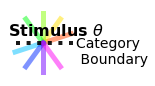

In [19]:
from tools_lnd import remove_ax_lines
fig = plt.figure(figsize=(.9,.9),tight_layout=True,facecolor='white')
ax2 = fig.add_axes([0, 0, 1, 1])
stim1_locs = np.min(trial.stim_locs[0:-1:20,[0,2]],axis=1) #only workds for single modality tasks
plot_stim_angles(ax2,stim1_locs,linewidth = 10, alpha = .9, markersize = 10,
                cat_task = True, show_stim = True, two_task = False, two_period = False, 
                 periods = ['Stimulus','Response'],show_rainbow = True)

figname = 'stim_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'stim_legend.png'
plt.savefig(os.path.join(figpath,figname))
plt.show()